In [1]:
import Peptide_Chef as Chef
import math
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
# from Peptide_Chef import Cook_Book

In [2]:
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The numpy version is 1.19.1.
The pandas version is 1.0.5.
The matplotlib version is 3.2.2.
The seaborn version is 0.11.0.


# In silico Digestion 

In [3]:
# use labelling format (below) to keep track of dfs.
##(*_dig= Digestion of Given Enzyme/Missed/Length/Charge)

In [4]:
url="https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Eukaryota/UP000005640/UP000005640_9606.fasta.gz"

In [5]:
Menu=Chef.CookBook(homebrew=False, takeout=True,url=url,measure=True, target="Peptide")

Unzipping...
Takeout is Done!
Here ya go boss!


In [6]:
Menu.head()

,Peptide,UniprotID,Gene,Identification,Protein_Length
0,MGCCGCGSCGGCGGGCGGCGGGCGGGCGGGCGSCTTCRCYRVGCCS...,A0A286YF01,SCGR7,HUMAN Small cysteine and glycine repeat-contai...,96
1,MRAKPQSPLPRNPVPAWSPPTTTTDPMLEKDAAGGDFPANLVLQLM...,A1L1A6,IGS23,HUMAN Immunoglobulin superfamily member 23 OS=...,192
2,MVLLAGTRPQGGEARCMIPPPPSPLLGAQVEEDRTEFKEFQDFSSL...,A6NHS1,YK042,HUMAN Putative uncharacterized protein ENSP000...,94
3,MRLCLIPWNTTPHRVLPPVVWSAPSRKKPVLSARNSMMFGHLSPVR...,A6NL46,YF016,HUMAN Putative UPF0607 protein ENSP00000332738...,340
4,MRLCLIPQNTGTPQRVLPPVVWSPPSRKKPMLSACNSMMFGHLSPV...,A8MUI8,YA034,HUMAN Putative UPF0607 protein ENSP00000383783...,341


In [7]:
Chef.rules

{'arg-c': 'R',
 'asp-n': '\\w(?=D)',
 'bnps-skatole': 'W',
 'caspase 1': '(?<=[FWYL]\\w[HAT])D(?=[^PEDQKR])',
 'caspase 2': '(?<=DVA)D(?=[^PEDQKR])',
 'caspase 3': '(?<=DMQ)D(?=[^PEDQKR])',
 'caspase 4': '(?<=LEV)D(?=[^PEDQKR])',
 'caspase 5': '(?<=[LW]EH)D',
 'caspase 6': '(?<=VE[HI])D(?=[^PEDQKR])',
 'caspase 7': '(?<=DEV)D(?=[^PEDQKR])',
 'caspase 8': '(?<=[IL]ET)D(?=[^PEDQKR])',
 'caspase 9': '(?<=LEH)D',
 'caspase 10': '(?<=IEA)D',
 'chymotrypsin high specificity': '([FY](?=[^P]))|(W(?=[^MP]))',
 'chymotrypsin low specificity': '([FLY](?=[^P]))|(W(?=[^MP]))|(M(?=[^PY]))|(H(?=[^DMPW]))',
 'clostripain': 'R',
 'cnbr': 'M',
 'enterokinase': '(?<=[DE]{3})K',
 'factor xa': '(?<=[AFGILTVM][DE]G)R',
 'formic acid': 'D',
 'glutamyl endopeptidase': 'E',
 'granzyme b': '(?<=IEP)D',
 'hydroxylamine': 'N(?=G)',
 'iodosobenzoic acid': 'W',
 'lysc': 'K',
 'ntcb': '\\w(?=C)',
 'pepsin ph1.3': '((?<=[^HKR][^P])[^R](?=[FL][^P]))|((?<=[^HKR][^P])[FL](?=\\w[^P]))',
 'pepsin ph2.0': '((?<=[^HKR][^P])

## Trypsin in Silco Digestion

In [20]:
# Trypsin in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="trypsin"
Tryp_Peptides=[]
for site in missed_sites:
    x=f"Tryp_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="Gene", rule=enzyme,min_charge=1.55,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)
    Tryp_Peptides.append(globals()[str(x)])
    

You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 0-missed cleavages. 
Preparing your order...
Order is up! You have acquired 416712 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 1-missed cleavages. 
Preparing your order...
Order is up! You have acquired 1149634 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 2-missed cleavages. 
Preparing your order...
Order is up! You have acquired 1989047 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut pept

In [21]:
Tryp_0_dig.head()

,SCGR7,gene,aa_comp,peptide,Length,z,Mass,m/z,counts
0,TCGSCGCGCGK,SCGR7,"{'T': 1, 'C': 4, 'G': 4, 'S': 1, 'K': 1}",TCGSCGCGCGK,11,1.686,956.297266,567.198853,4
1,TCGSCGCGCGK,SCGR7,"{'T': 1, 'C': 4, 'G': 4, 'S': 1, 'K': 1}",TCGSCGCGCGK,11,1.686,956.297266,567.198853,4
2,TCGSCGCGCGK,SCGR7,"{'T': 1, 'C': 4, 'G': 4, 'S': 1, 'K': 1}",TCGSCGCGCGK,11,1.686,956.297266,567.198853,4
3,TCGSCGCGCGK,SCGR7,"{'T': 1, 'C': 4, 'G': 4, 'S': 1, 'K': 1}",TCGSCGCGCGK,11,1.686,956.297266,567.198853,4
4,NaN,IGS23,"{'Q': 3, 'L': 9, 'V': 2, 'S': 6, 'E': 4, 'P': ...",QLVSEPVTISLPKPIMQPTEAEPMEPDPTLSLSGGSAIGLLAAGIL...,64,2.642,6463.464677,2446.428720,7


In [22]:
Marked = set(Tryp_0_dig.gene)
Total= set(Menu.Gene)
unique= list(Marked ^ Total)
len(unique)

5227

In [23]:
T_Missed = Menu[Menu['Gene'].isin(unique)]
T_Missed.reset_index(inplace=True)
T_Missed

,index,Peptide,UniprotID,Gene,Identification,Protein_Length
0,6,MVGGGWKRRPGAGAGPQCEKTVDVKKSKFCEADVSSDLRKEVENHY...,A8MVJ9,HPF1L,HUMAN Putative histone PARylation factor 1-lik...,347
1,9,MTGSNSHITILTLNVNGLNSPIKRHRLASWIKSQDPSVCCIQETHL...,O00370,LORF2,HUMAN LINE-1 retrotransposable element ORF2 pr...,1275
2,13,MASKPAAGKSRGEKRKRVVLTLKEKIDICTRLEKGESRKALMQEYN...,O75564,JERKY,HUMAN Jerky protein homolog OS=Homo sapiens OX...,556
3,20,MAENGDNEKMAALEAKICHQIEYYFGDFNLPRDKFLKEQIKLDEGW...,P05455,LA,HUMAN Lupus La protein OS=Homo sapiens OX=9606...,408
4,21,MIRTLLLSTLVAGALSCGVSTYAPDMSRMLGGEEARPNSWPWQVSL...,P08218,CEL2B,HUMAN Chymotrypsin-like elastase family member...,269
...,...,...,...,...,...,...
5222,20596,MADRSLEGMALPLEVRARLAELELELSEGDITQKGYEKKRSKLIGA...,Q9Y2E4,DIP2C,HUMAN Disco-interacting protein 2 homolog C OS...,1556
5223,20601,MATERSRSAMDSPVPASMFAPEPSSPGAARAAAAAARLHGGFDSDC...,O00178,GTPB1,HUMAN GTP-binding protein 1 OS=Homo sapiens OX...,669
5224,20602,MASRKEGTGSTATSSSSTAGAAGKGKGKGGSGDSAVKQVQIDGLVV...,O15372,EIF3H,HUMAN Eukaryotic translation initiation factor...,352
5225,20606,MSATDRMGPRAVPGLRLALLLLLVLGTPKSGVQGQEGLDFPEYDGV...,P31415,CASQ1,HUMAN Calsequestrin-1 OS=Homo sapiens OX=9606 ...,396


In [24]:
x=Chef.Cleaver(T_Missed["Peptide"][1],rule="trypsin",exception=None,missed_cleavages=1,min_length=7,max_length=100)
x

['MTGSNSHITILTLNVNGLNSPIK',
 'MTGSNSHITILTLNVNGLNSPIKR',
 'HRLASWIK',
 'LASWIKSQDPSVCCIQETHLTCR',
 'SQDPSVCCIQETHLTCR',
 'SQDPSVCCIQETHLTCRDTHR',
 'KIYQANGK',
 'IYQANGK',
 'IYQANGKQK',
 'KAGVAILVSDK',
 'AGVAILVSDK',
 'AGVAILVSDKTDFKPTK',
 'TDFKPTK',
 'TDFKPTKIK',
 'DKEGHYIMVK',
 'EGHYIMVK',
 'EGHYIMVKGSIQQEELTILNIYAPNTGAPR',
 'GSIQQEELTILNIYAPNTGAPR',
 'GSIQQEELTILNIYAPNTGAPRFIK',
 'FIKQVLSDLQR',
 'QVLSDLQR',
 'QVLSDLQRDLDSHTLIMGDFNTPLSILDR',
 'DLDSHTLIMGDFNTPLSILDR',
 'DLDSHTLIMGDFNTPLSILDRSTR',
 'VNKDTQELNSALHQTDLIDIYR',
 'DTQELNSALHQTDLIDIYR',
 'DTQELNSALHQTDLIDIYRTLHPK',
 'TLHPKSTEYTFFSAPHHTYSK',
 'STEYTFFSAPHHTYSK',
 'STEYTFFSAPHHTYSKIDHIVGSK',
 'IDHIVGSK',
 'IDHIVGSKALLSK',
 'ALLSKCK',
 'RTEIITNYLSDHSAIK',
 'TEIITNYLSDHSAIK',
 'TEIITNYLSDHSAIKLELR',
 'IKNLTQSR',
 'NLTQSRSTTWK',
 'STTWKLNNLLLNDYWVHNEMK',
 'LNNLLLNDYWVHNEMK',
 'LNNLLLNDYWVHNEMKAEIK',
 'AEIKMFFETNENK',
 'MFFETNENK',
 'MFFETNENKDTTYQNLWDAFK',
 'DTTYQNLWDAFK',
 'DTTYQNLWDAFKAVCR',
 'GKFIALNAYK',
 'FIALNAYK',
 'FIALNAY

In [25]:
Chef.Marinate(T_Missed,"Peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True,Peptide_Inspector=False)

Marinating peptides...


C:\Users\tcoop\Anaconda3\envs\SciFly\lib\site-packages\Peptide_Chef\__init__.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IPC"]=df[target].apply(Scales.Peptide_IPC)


IPC calculated!


C:\Users\tcoop\Anaconda3\envs\SciFly\lib\site-packages\Peptide_Chef\__init__.py:348: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hydro_Sum"]=df[target].apply(Scales.Peptide_GRAVY)
C:\Users\tcoop\Anaconda3\envs\SciFly\lib\site-packages\Peptide_Chef\__init__.py:351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Neutral_Z"]=df[target].apply(Scales.Peptide_Neutral_pH)


Its all GRAVY Baby!
Charge at Neutral pH added!
Peptides have been marinated!


,index,Peptide,UniprotID,Gene,Identification,Protein_Length,IPC,Hydro_Sum,Neutral_Z
0,6,MVGGGWKRRPGAGAGPQCEKTVDVKKSKFCEADVSSDLRKEVENHY...,A8MVJ9,HPF1L,HUMAN Putative histone PARylation factor 1-lik...,347,8.111865,-0.540922,3.0
1,9,MTGSNSHITILTLNVNGLNSPIKRHRLASWIKSQDPSVCCIQETHL...,O00370,LORF2,HUMAN LINE-1 retrotransposable element ORF2 pr...,1275,10.057510,-0.512000,80.0
2,13,MASKPAAGKSRGEKRKRVVLTLKEKIDICTRLEKGESRKALMQEYN...,O75564,JERKY,HUMAN Jerky protein homolog OS=Homo sapiens OX...,556,7.848545,-0.411331,3.0
3,20,MAENGDNEKMAALEAKICHQIEYYFGDFNLPRDKFLKEQIKLDEGW...,P05455,LA,HUMAN Lupus La protein OS=Homo sapiens OX=9606...,408,6.780635,-0.973284,-1.0
4,21,MIRTLLLSTLVAGALSCGVSTYAPDMSRMLGGEEARPNSWPWQVSL...,P08218,CEL2B,HUMAN Chymotrypsin-like elastase family member...,269,6.546572,0.004089,-1.0
...,...,...,...,...,...,...,...,...,...
5222,20596,MADRSLEGMALPLEVRARLAELELELSEGDITQKGYEKKRSKLIGA...,Q9Y2E4,DIP2C,HUMAN Disco-interacting protein 2 homolog C OS...,1556,7.029326,-0.118188,-2.0
5223,20601,MATERSRSAMDSPVPASMFAPEPSSPGAARAAAAAARLHGGFDSDC...,O00178,GTPB1,HUMAN GTP-binding protein 1 OS=Homo sapiens OX...,669,8.316670,-0.307474,6.0
5224,20602,MASRKEGTGSTATSSSSTAGAAGKGKGKGGSGDSAVKQVQIDGLVV...,O15372,EIF3H,HUMAN Eukaryotic translation initiation factor...,352,6.109482,-0.552557,-5.0
5225,20606,MSATDRMGPRAVPGLRLALLLLLVLGTPKSGVQGQEGLDFPEYDGV...,P31415,CASQ1,HUMAN Calsequestrin-1 OS=Homo sapiens OX=9606 ...,396,3.858955,-0.432071,-71.0


In [26]:
len(Tryp_Peptides)

4

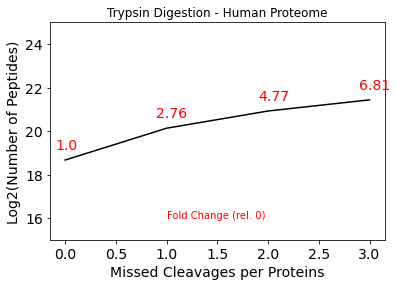

In [27]:
T_Pep_Counts=[]
#Count are in Log10
for df in Tryp_Peptides:
    log = math.log2(len(df))
    T_Pep_Counts.append(log)
plt.plot(missed_sites,T_Pep_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome')
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([15, 25])
Ratios=[]
for count in T_Pep_Counts:
    ratio=2**(count-T_Pep_Counts[0])
    ratiox=float(round(ratio,2))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,T_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1,16,"Fold Change (rel. 0)",color="red")
plt.show()

The number of proteins with > 0 peptides : 15387.0
Ratio of Proteins with > 0 Peptides Identified: 100.000
The number of proteins with > 0 peptides : 15411.0
Ratio of Proteins with > 0 Peptides Identified: 100.000
The number of proteins with > 0 peptides : 15411.0
Ratio of Proteins with > 0 Peptides Identified: 100.000
The number of proteins with > 0 peptides : 15412.0
Ratio of Proteins with > 0 Peptides Identified: 100.000


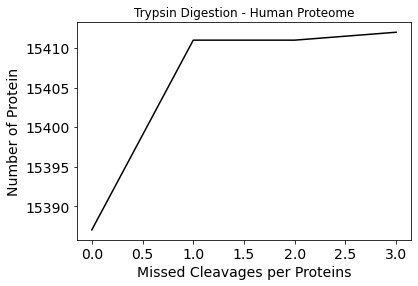

In [28]:
T_Pro_Counts=[]
xx=[]
#Count are in Log10
for df in Tryp_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",0)
    T_Pro_Counts.append(y)
    xx.append(x)
plt.plot(missed_sites,T_Pro_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome')
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Protein', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The number of proteins with > 1 peptides : 15288.0
Ratio of Proteins with > 1 Peptides Identified: 99.357
The number of proteins with > 1 peptides : 15401.0
Ratio of Proteins with > 1 Peptides Identified: 99.935
The number of proteins with > 1 peptides : 15402.0
Ratio of Proteins with > 1 Peptides Identified: 99.942
The number of proteins with > 1 peptides : 15403.0
Ratio of Proteins with > 1 Peptides Identified: 99.942


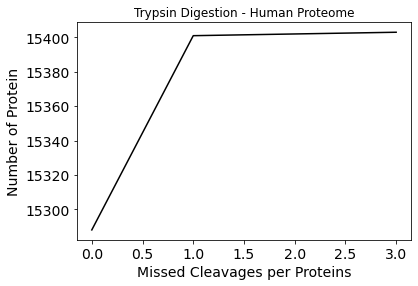

In [29]:
T_Pro_Counts=[]
xx=[]
#Count are in Log10
for df in Tryp_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",1)
    T_Pro_Counts.append(y)
    xx.append(x)
plt.plot(missed_sites,T_Pro_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome')
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Protein', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [30]:
xx[0]

,gene
TITIN,1852
MUC16,566
DYST,440
MACF1,439
OBSCN,386
...,...
TYB4,2
A0A6Q8PFC9,2
A0A0G2JPN4,2
CD24,2


In [31]:
import re
def Pep2Pro(protein,peptides):
    protein = re.sub(r'[^A-Z]', '', protein)
    mask = np.zeros(len(protein), dtype=np.int8)
    for peptide in peptides:
        indices = [m.start() for m in re.finditer(
            '(?={})'.format(re.sub(r'[^A-Z]', '', peptide)), protein)]
        for i in indices:
            mask[i:i + len(peptide)] = 1
    return mask.sum(dtype=float) / mask.size

In [32]:
raw=Menu[["Peptide", "Gene"]].set_index("Gene").to_dict()["Peptide"]
Tryp_Silico_Coverage=pd.DataFrame()
i=0
columns=["Tryp_0","Tryp_1","Tryp_2","Tryp_3",]
for df in Tryp_Peptides:
    name=f"SC_{columns[i]}" 
    x_list=list()
    for gene, protein in raw.items():
        temp=df.loc[df.gene == gene]["peptide"]
        temp2=list(temp)
        x=Pep2Pro(protein,temp2)
        x_list.append(x)
    Tryp_Silico_Coverage[name]= np.array(x_list)
    i+=1
    print("On to the next...")
print("Done")

On to the next...
On to the next...
On to the next...
On to the next...
Done


In [ ]:
Tryp_Silico_Coverage.replace(np.nan, 0, inplace=True)

In [ ]:
Tryp_Silico_Coverage.describe()

In [ ]:
plt.hist(Tryp_Silico_Coverage['SC_Tryp_0'])

In [ ]:
Tryp_Silico_Coverage.to_excel('Silico_Trypsin_Coverage.xlsx')

In [ ]:
df1 = Tryp_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('Trypsin-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique');

## AspN in Silco Digestion

In [ ]:
# AspN in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="asp-n"
AspN_Peptides=[]
for site in missed_sites:
    x=f"AspN_{site}_dig"
    zz=Chef.ButcherShop(Menu,target="Peptide",identifier="Gene", rule=enzyme,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(zz,meat_package=True)
    AspN_Peptides.append(globals()[str(x)])
    
    

In [ ]:
AspN_Peptides[0]

In [ ]:
len(AspN_Peptides)

In [ ]:
A_Pep_Counts=[]
#Count are in Log10
for df in AspN_Peptides:
    log = math.log2(len(df))
    A_Pep_Counts.append(log)
plt.plot(missed_sites,A_Pep_Counts,color="black")
plt.title('AspN Digestion - Human Proteome', fontsize=12)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([15, 25])
Ratios=[]
for count in A_Pep_Counts:
    ratio=2**(count-A_Pep_Counts[0])
    ratiox=float(round(ratio,2))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,A_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1,16,"Fold Change (rel. 0)",color="red", fontsize=10)
plt.show()

In [ ]:
A_Pro_Counts=[]
#Count are in Log10
for df in AspN_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",1)
    A_Pro_Counts.append(y)
plt.plot(missed_sites,A_Pro_Counts,color="black")
plt.title('Asp-N Digestion - Human Proteome', fontsize=12)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Proteins', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
raw=Menu[["Peptide", "Gene"]].set_index("Gene").to_dict()["Peptide"]
AspN_Silico_Coverage=pd.DataFrame()
i=0
columns=["AspN_0","AspN_1","AspN_2","AspN_3",]
for df in AspN_Peptides:
    name=f"SC_{columns[i]}" 
    x_list=list()
    max_len=len(df)
    for gene, protein in raw.items():
        temp=df.loc[df.gene == gene]["peptide"]
        temp2=list(temp)
        x=Pep2Pro(protein,temp2)
        x_list.append(x)
    AspN_Silico_Coverage[name]= np.array(x_list)
    i+=1
    print("On to the next...")
print("Done")

In [ ]:
AspN_Silico_Coverage.replace(0,np.nan, inplace=True)

In [ ]:
AspN_Silico_Coverage.describe()

In [ ]:
plt.hist(AspN_Silico_Coverage['SC_AspN_0'])

In [ ]:
AspN_Silico_Coverage.to_excel('Silico_AspN_Coverage.xlsx')

In [ ]:
df1 = AspN_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('AspN-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique');

## GluC in Silco Digestion

In [ ]:
# Trypsin in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="glutamyl endopeptidase"
for site in missed_sites:
    x=f"GluC_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="Gene", rule=enzyme,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)

In [ ]:
GluC_0_dig.head()

# Raw Experimental Data